In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://real-time-finance-data.p.rapidapi.com/company-cash-flow"

querystring = {"symbol":"AAPL:NASDAQ","period":"QUARTERLY","language":"en"}

headers = {
	"x-rapidapi-key": "562e63dd9fmsh11d6c0335e5d151p119418jsn29c531687e33",
	"x-rapidapi-host": "real-time-finance-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
result = response.json()
data =  result['data']
data

{'symbol': 'AAPL:NASDAQ',
 'type': 'stock',
 'cash_flow': [{'date': '2024-9-28',
   'year': 2024,
   'month': 9,
   'day': 28,
   'currency': 'USD',
   'net_income': 14736000000,
   'cash_from_operations': 26811000000,
   'cash_from_investing': 1445000000,
   'cash_from_financing': -24948000000,
   'net_change_in_cash': 3308000000,
   'free_cash_flow': 33312375000},
  {'date': '2024-6-29',
   'year': 2024,
   'month': 6,
   'day': 29,
   'currency': 'USD',
   'net_income': 21448000000,
   'cash_from_operations': 28858000000,
   'cash_from_investing': -127000000,
   'cash_from_financing': -36017000000,
   'net_change_in_cash': -7286000000,
   'free_cash_flow': 22498000000},
  {'date': '2024-3-30',
   'year': 2024,
   'month': 3,
   'day': 30,
   'currency': 'USD',
   'net_income': 23636000000,
   'cash_from_operations': 22690000000,
   'cash_from_investing': -310000000,
   'cash_from_financing': -30433000000,
   'net_change_in_cash': -8053000000,
   'free_cash_flow': 20609500000},
  {'d

In [25]:
# DataFrame oluşturma

df = pd.DataFrame(data)

# cash_flow sütununu ayrıştırıp yeni bir DataFrame'e dönüştürme
cash_flow_df = pd.json_normalize(df['cash_flow'])

# Orijinal DataFrame ile ayrıştırılmış verileri birleştirme
df = pd.concat([df.drop(columns='cash_flow'), cash_flow_df], axis=1)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Sonuçları görüntüleme
df.head(15)

,symbol,type,period,date,year,month,day,currency,net_income,cash_from_operations,cash_from_investing,cash_from_financing,net_change_in_cash,free_cash_flow
0,AAPL:NASDAQ,stock,QUARTERLY,2024-09-28,2024,9,28,USD,14736000000,26811000000,1445000000,-24948000000,3308000000,33312375000
1,AAPL:NASDAQ,stock,QUARTERLY,2024-06-29,2024,6,29,USD,21448000000,28858000000,-127000000,-36017000000,-7286000000,22498000000
2,AAPL:NASDAQ,stock,QUARTERLY,2024-03-30,2024,3,30,USD,23636000000,22690000000,-310000000,-30433000000,-8053000000,20609500000
3,AAPL:NASDAQ,stock,QUARTERLY,2024-12-30,2024,12,30,USD,33916000000,39895000000,1927000000,-30585000000,11237000000,33200125000
4,AAPL:NASDAQ,stock,QUARTERLY,2023-09-30,2023,9,30,USD,22956000000,21598000000,2394000000,-23153000000,839000000,11682375000
5,AAPL:NASDAQ,stock,QUARTERLY,2023-07-01,2023,7,1,USD,19881000000,26380000000,437000000,-24048000000,2769000000,21066750000
6,AAPL:NASDAQ,stock,QUARTERLY,2023-04-01,2023,4,1,USD,24160000000,28560000000,2319000000,-25724000000,5155000000,22445750000
7,AAPL:NASDAQ,stock,QUARTERLY,2023-12-31,2023,12,31,USD,29998000000,34005000000,-1445000000,-35563000000,-3003000000,28817000000
8,AAPL:NASDAQ,stock,QUARTERLY,2022-09-24,2022,9,24,USD,20721000000,24127000000,-1217000000,-26794000000,-3884000000,20182875000


Temel İstatistikler:
              year      month        day    net_income  cash_from_operations  \
count     9.000000   9.000000   9.000000  9.000000e+00          9.000000e+00   
mean   2023.333333   7.888889  22.666667  2.349467e+10          2.810267e+10   
std       0.707107   3.179797  12.449900  5.627002e+09          5.774144e+09   
min    2022.000000   3.000000   1.000000  1.473600e+10          2.159800e+10   
25%    2023.000000   6.000000  24.000000  2.072100e+10          2.412700e+10   
50%    2023.000000   9.000000  29.000000  2.295600e+10          2.681100e+10   
75%    2024.000000   9.000000  30.000000  2.416000e+10          2.885800e+10   
max    2024.000000  12.000000  31.000000  3.391600e+10          3.989500e+10   

       cash_from_investing  cash_from_financing  net_change_in_cash  \
count         9.000000e+00         9.000000e+00        9.000000e+00   
mean          6.025556e+08        -2.858500e+10        1.202222e+08   
std           1.479654e+09         4.822525e+

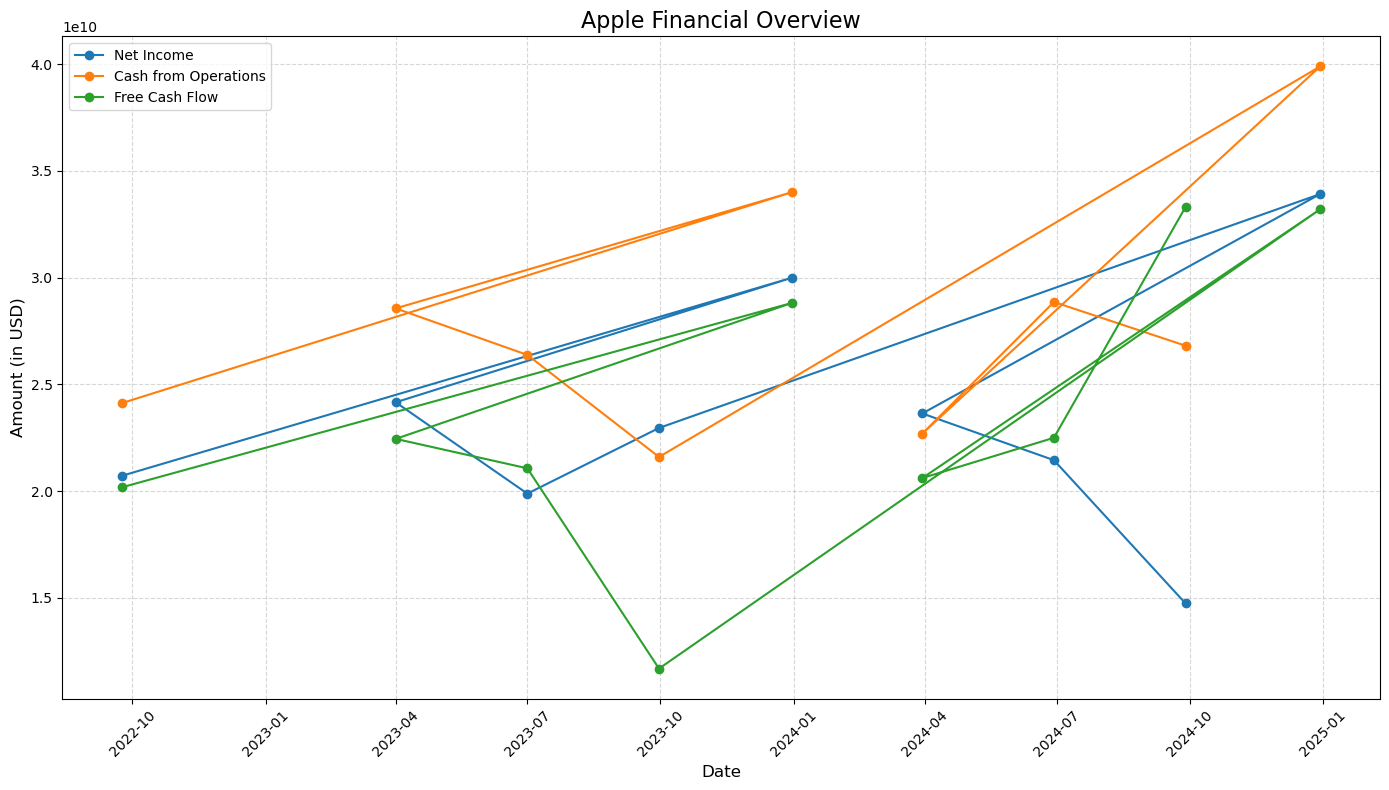

In [22]:
# Temel İstatistikler
print("Temel İstatistikler:")
print(df.describe())

# Net Gelir, Faaliyetlerden Gelen Nakit ve Serbest Nakit Akışını Görselleştirme
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['net_income'], marker='o', label='Net Income')
plt.plot(df['date'], df['cash_from_operations'], marker='o', label='Cash from Operations')
plt.plot(df['date'], df['free_cash_flow'], marker='o', label='Free Cash Flow')
plt.title("Apple Financial Overview", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Amount (in USD)", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

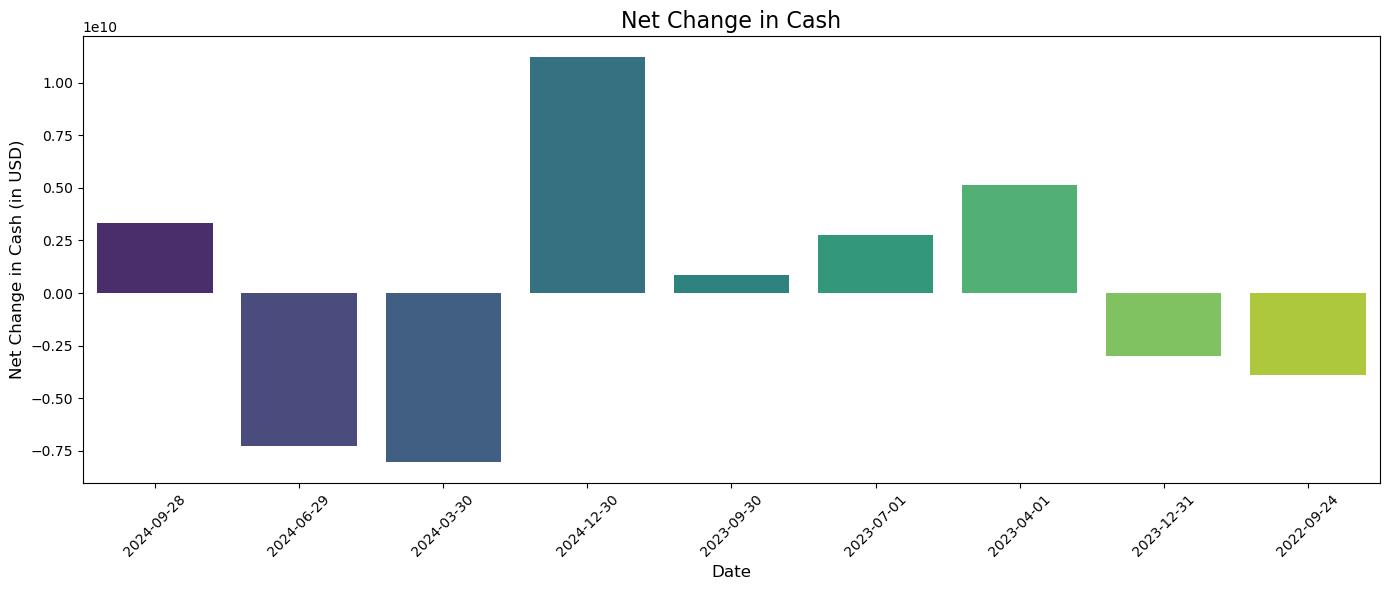

In [23]:
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Nakit Değişimi Çubuk Grafiği
plt.figure(figsize=(14, 6))
sns.barplot(x=df['date'].dt.strftime('%Y-%m-%d'), y=df['net_change_in_cash'], palette='viridis')
plt.title("Net Change in Cash", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Net Change in Cash (in USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\omerc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


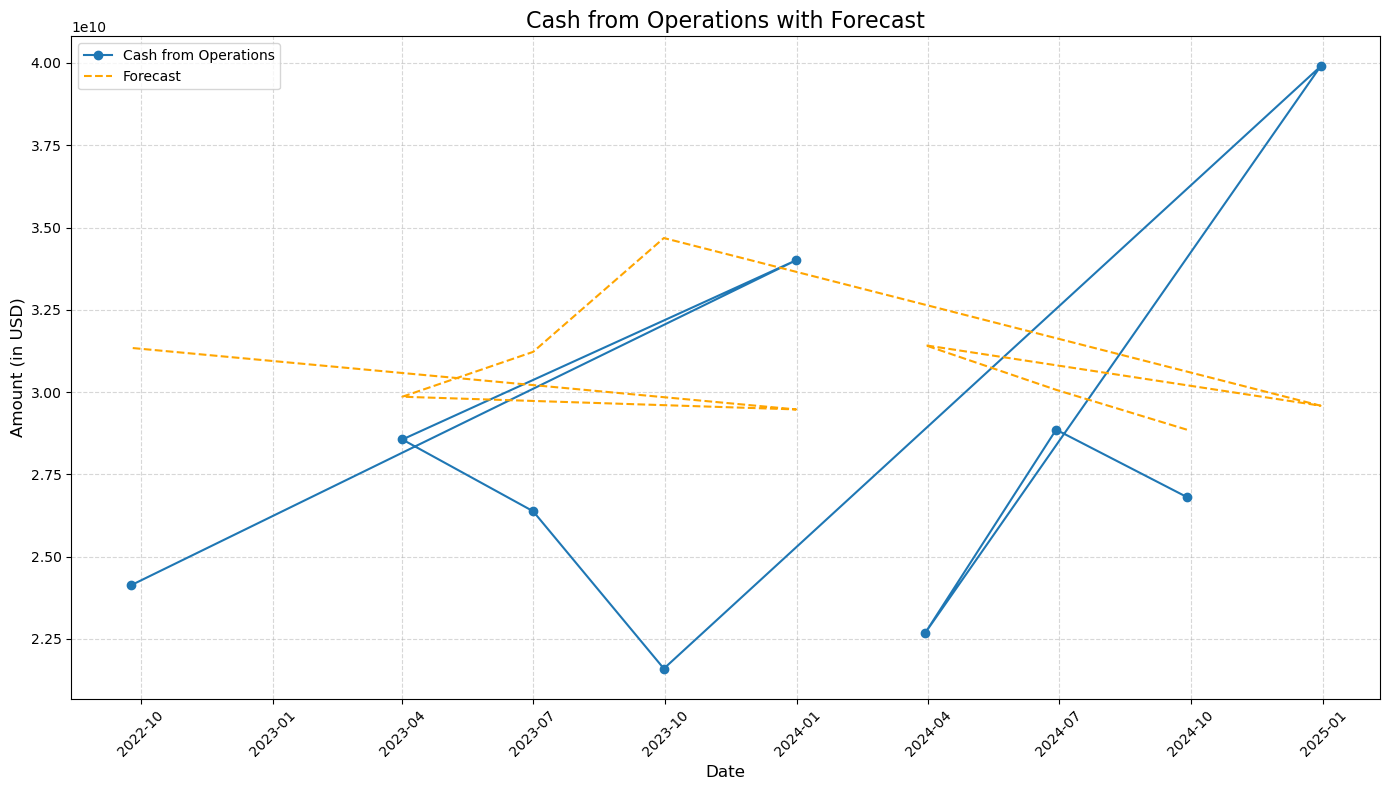

In [24]:
# Zaman Serisi Modeli
model = ExponentialSmoothing(df['cash_from_operations'], trend='add', seasonal=None)
fit = model.fit()
df['forecast'] = fit.fittedvalues

# Tahminleri Görselleştirme
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['cash_from_operations'], marker='o', label='Cash from Operations')
plt.plot(df['date'], df['forecast'], linestyle='--', label='Forecast', color='orange')
plt.title("Cash from Operations with Forecast", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Amount (in USD)", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Açıklama
Mavi Çizgi (Cash from Operations): Gerçek faaliyetlerden elde edilen nakit akışını gösteriyor. Bu çizgi, zaman içinde Apple'ın operasyonlarından ne kadar nakit ürettiğini temsil eder. Grafik, dönemsel dalgalanmalar ve genel trendleri ortaya koyuyor. Mavi noktalar, belirli çeyreklerdeki nakit akışını işaret eder.

Turuncu Kesikli Çizgi (Forecast): Holt-Winters Exponential Smoothing yöntemiyle yapılan tahmini gösteriyor. Bu model, geçmiş verilere dayanarak gelecekteki nakit akışını öngörmeye çalışır. Kesikli çizgi, gelecekteki nakit akışının olası değerlerini ve genel eğilimini yansıtır.

Gözlemler
Dalgalanmalar: Mavi çizgideki dalgalanmalar, Apple’ın faaliyetlerden elde ettiği nakit akışındaki dönemsel değişiklikleri gösterir. Bazen ciddi artışlar veya düşüşler gözlemlenebilir.
Tahmin: Turuncu kesikli çizgi, gelecekteki nakit akışının genel olarak nasıl bir eğilimde olacağını gösteriyor. Model, mevcut verileri kullanarak gelecekteki değerleri öngörüyor, ancak gerçekte her zaman mükemmel bir şekilde gerçekleşmeyebilir.
Düşüş ve Yükselişler: Görselde, tahminin bazen gerçek değerlerden ayrıldığı veya yakınlaştığı yerler bulunur. Bu, modelin geçmiş verilerden öğrenme şekline bağlı olarak gelecekteki değerlerin kesinliği hakkında bilgi verir.


Holt-Winters Exponential Smoothing modeli, zaman serisi analizinde yaygın olarak kullanılan bir yöntemdir. Zaman serisi verilerinin trend (zamanla genel eğilim) ve mevsimsellik (dönemsel kalıplar) gibi özelliklerini yakalamak için geliştirilmiştir.

Bu veri, Apple'ın (AAPL
) hisse senedi için çeşitli finansal verileri içeren çeyrek dönemlere ait nakit akış tablosunu temsil ediyor. Her bir dönemdeki önemli finansal kalemleri analiz edelim:

Net Income (Net Kar): Şirketin belirli bir dönemde elde ettiği toplam kârı temsil eder. Apple'ın net kârı dönemden döneme değişiklik gösteriyor, ancak genel olarak güçlü ve istikrarlı.

Cash from Operations (Faaliyetlerden Gelen Nakit Akışı): İşletme faaliyetlerinden elde edilen nakit miktarıdır. Bu rakamlar, Apple'ın operasyonlarından önemli ölçüde nakit ürettiğini gösteriyor, bu da operasyonların verimliliğini ve Apple'ın sağlam iş modelini yansıtıyor.

Cash from Investing (Yatırımlardan Gelen Nakit Akışı): Apple'ın yatırımlardan (örneğin, varlık alımları veya yatırımların satışı) elde ettiği veya harcadığı nakit miktarı. Genellikle bu kalem, yeni yatırımlar veya varlık alımları nedeniyle negatif olabiliyor.

Cash from Financing (Finansmandan Gelen Nakit Akışı): Borçlanma, hisse senedi geri alımları ve temettüler gibi finansman faaliyetlerinden gelen veya çıkan nakit miktarını gösterir. Apple’ın burada negatif rakamlar göstermesi, hisse geri alımları ve temettü ödemeleri gibi nedenlerle dışarıya nakit çıkışı olduğunu işaret ediyor.

Net Change in Cash (Nette Nakit Değişimi): Dönem boyunca Apple'ın toplam nakit pozisyonundaki değişimi gösterir. Bazı çeyreklerde nakit pozisyonunda artış, bazılarında ise azalma görülüyor. Bu dalgalanmalar, Apple’ın yatırım ve finansman stratejilerine göre değişiklik gösterebilir.

Free Cash Flow (Serbest Nakit Akışı): Apple'ın operasyonlarından elde ettiği nakit, sermaye harcamaları çıkarıldıktan sonra kalan tutardır. Serbest nakit akışı, şirketin finansal sağlığını ve nakit üretme kapasitesini gösterir. Apple'ın serbest nakit akışının güçlü olduğu görülüyor, bu da şirketin borçlarını ödeyebilme, yatırımları finanse edebilme ve hissedarlara getiri sağlama kapasitesine sahip olduğunu gösterir.

In [ ]:
# https://rapidapi.com/letscrape-6bRBa3QguO5/api/real-time-finance-data/playground/endpoint_0ad54c53-f027-44ec-addd-5908aa6ea55c